In [741]:
import pandas as pd
pd.set_option("display.max_columns", None)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
import datetime as dt

In [742]:
df = pd.read_csv('flights_160K.csv')

In [743]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-10,AA,AA_CODESHARE,AA,5393,OH,N580NN,5393,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,0.0,NaN,0.0,N,74.0,75.0,47.0,1.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-05-08,WN,WN,WN,1065,WN,N267WN,1065,13232,MDW,"Chicago, IL",11066,CMH,"Columbus, OH",2255,2337.0,42.0,10.0,2347.0,129.0,3.0,105,132.0,27.0,0.0,NaN,0.0,N,70.0,55.0,42.0,1.0,283.0,27.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2018-11-09,UA,UA,UA,739,UA,N13110,739,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,0.0,NaN,0.0,N,238.0,248.0,228.0,1.0,1546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-27,AA,AA,AA,2283,AA,N972TW,2283,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,0.0,NaN,0.0,N,137.0,114.0,102.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-05,DL,DL,DL,1678,DL,N321US,1678,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,0.0,NaN,0.0,N,181.0,172.0,149.0,1.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [744]:
df[df.carrier_delay.isnull()].head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-10,AA,AA_CODESHARE,AA,5393,OH,N580NN,5393,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,0.0,NaN,0.0,N,74.0,75.0,47.0,1.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-09,UA,UA,UA,739,UA,N13110,739,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,0.0,NaN,0.0,N,238.0,248.0,228.0,1.0,1546.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-27,AA,AA,AA,2283,AA,N972TW,2283,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,0.0,NaN,0.0,N,137.0,114.0,102.0,1.0,641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-05,DL,DL,DL,1678,DL,N321US,1678,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,0.0,NaN,0.0,N,181.0,172.0,149.0,1.0,1235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-06-18,AS,AS_CODESHARE,AS,2565,QX,N628QX,2565,14057,PDX,"Portland, OR",14893,SMF,"Sacramento, CA",625,630.0,5.0,15.0,645.0,752.0,5.0,806,757.0,-9.0,0.0,NaN,0.0,N,101.0,87.0,67.0,1.0,479.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [745]:
df['cancelled']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
159995    0.0
159996    0.0
159997    0.0
159998    0.0
159999    0.0
Name: cancelled, Length: 160000, dtype: float64

In [746]:
df[df['cancelled'] == 1]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
118,2019-08-26,AA,AA_CODESHARE,AA,4883,PT,N643AE,4883,13342,MKE,"Milwaukee, WI",14100,PHL,"Philadelphia, PA",958,NaN,NaN,NaN,NaN,NaN,NaN,1305,NaN,NaN,1.0,A,0.0,N,127.0,NaN,NaN,1.0,690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,2018-03-21,DL,DL,DL,875,DL,N927DA,875,10821,BWI,"Baltimore, MD",10397,ATL,"Atlanta, GA",1936,NaN,NaN,NaN,NaN,NaN,NaN,2136,NaN,NaN,1.0,B,0.0,N,120.0,NaN,NaN,1.0,577.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,2018-07-23,B6,B6,B6,408,B6,N294JB,408,12478,JFK,"New York, NY",14321,PWM,"Portland, ME",1700,NaN,NaN,NaN,NaN,NaN,NaN,1833,NaN,NaN,1.0,C,0.0,N,93.0,NaN,NaN,1.0,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,2018-10-18,AA,AA,AA,335,AA,N350AN,335,13930,ORD,"Chicago, IL",13303,MIA,"Miami, FL",1200,NaN,NaN,NaN,NaN,NaN,NaN,1605,NaN,NaN,1.0,A,0.0,N,185.0,NaN,NaN,1.0,1197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,2019-06-03,WN,WN,WN,534,WN,NaN,534,15304,TPA,"Tampa, FL",10821,BWI,"Baltimore, MD",1125,NaN,NaN,NaN,NaN,NaN,NaN,1345,NaN,NaN,1.0,A,0.0,N,140.0,NaN,NaN,1.0,842.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159849,2019-09-13,AS,AS,AS,331,AS,N408AS,331,11618,EWR,"Newark, NJ",12892,LAX,"Los Angeles, CA",1925,1933.0,8.0,NaN,NaN,NaN,NaN,2230,NaN,NaN,1.0,A,0.0,N,365.0,NaN,NaN,1.0,2454.0,NaN,NaN,NaN,NaN,NaN,1933.0,68.0,68.0,NaN
159858,2018-06-20,AA,AA_CODESHARE,AA,4094,MQ,N664MS,4094,11193,CVG,"Cincinnati, OH",13930,ORD,"Chicago, IL",705,NaN,NaN,NaN,NaN,NaN,NaN,729,NaN,NaN,1.0,C,0.0,N,84.0,NaN,NaN,1.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159894,2019-02-11,WN,WN,WN,1583,WN,N709SW,1583,15016,STL,"St. Louis, MO",13232,MDW,"Chicago, IL",1700,NaN,NaN,NaN,NaN,NaN,NaN,1810,NaN,NaN,1.0,B,0.0,N,70.0,NaN,NaN,1.0,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159900,2018-07-11,WN,WN,WN,406,WN,N779SW,406,13796,OAK,"Oakland, CA",12889,LAS,"Las Vegas, NV",1625,NaN,NaN,NaN,NaN,NaN,NaN,1745,NaN,NaN,1.0,B,0.0,N,80.0,NaN,NaN,1.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [747]:
# drop flights that are cancelled
df = df[df['cancelled'] != 1]

In [748]:
# drop flights that are diverted
df = df[df['diverted'] != 1]

In [749]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [750]:
# Drop columns not required
df = df.drop(axis = 1, labels = ['branded_code_share', 'mkt_carrier_fl_num', 'tail_num', 'op_carrier_fl_num', 'cancelled', 'cancellation_code', 'diverted', 'flights', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name'])

In [751]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier', 'op_unique_carrier',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'arr_delay', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [752]:
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-06-10,AA,AA,OH,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,N,74.0,75.0,47.0,213.0,NaN,NaN,NaN,NaN,NaN
1,2019-05-08,WN,WN,WN,13232,MDW,"Chicago, IL",11066,CMH,"Columbus, OH",2255,2337.0,42.0,10.0,2347.0,129.0,3.0,105,132.0,27.0,N,70.0,55.0,42.0,283.0,27.0,0.0,0.0,0.0,0.0
2,2018-11-09,UA,UA,UA,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,N,238.0,248.0,228.0,1546.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-27,AA,AA,AA,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,N,137.0,114.0,102.0,641.0,NaN,NaN,NaN,NaN,NaN
4,2019-11-05,DL,DL,DL,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,N,181.0,172.0,149.0,1235.0,NaN,NaN,NaN,NaN,NaN


In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156846 entries, 0 to 159999
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              156846 non-null  object 
 1   mkt_unique_carrier   156846 non-null  object 
 2   mkt_carrier          156846 non-null  object 
 3   op_unique_carrier    156846 non-null  object 
 4   origin_airport_id    156846 non-null  int64  
 5   origin               156846 non-null  object 
 6   origin_city_name     156846 non-null  object 
 7   dest_airport_id      156846 non-null  int64  
 8   dest                 156846 non-null  object 
 9   dest_city_name       156846 non-null  object 
 10  crs_dep_time         156846 non-null  int64  
 11  dep_time             156846 non-null  float64
 12  dep_delay            156802 non-null  float64
 13  taxi_out             156780 non-null  float64
 14  wheels_off           156780 non-null  float64
 15  wheels_on        

In [754]:
df.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
mkt_carrier                 0
op_unique_carrier           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                  44
taxi_out                   66
wheels_off                 66
wheels_on                  66
taxi_in                    66
crs_arr_time                0
arr_time                    0
arr_delay                  28
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                   66
distance                    0
carrier_delay          126656
weather_delay          126656
nas_delay              126656
security_delay         126656
late_aircraft_delay    126656
dtype: int64

In [755]:
df = df[df['dep_delay'].notna()]
df = df[df['taxi_out'].notna()]
df = df[df['wheels_on'].notna()]
df = df[df['wheels_off'].notna()]
df = df[df['taxi_in'].notna()]
df = df[df['arr_delay'].notna()]
df = df[df['air_time'].notna()]

In [756]:
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-06-10,AA,AA,OH,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,N,74.0,75.0,47.0,213.0,NaN,NaN,NaN,NaN,NaN
1,2019-05-08,WN,WN,WN,13232,MDW,"Chicago, IL",11066,CMH,"Columbus, OH",2255,2337.0,42.0,10.0,2347.0,129.0,3.0,105,132.0,27.0,N,70.0,55.0,42.0,283.0,27.0,0.0,0.0,0.0,0.0
2,2018-11-09,UA,UA,UA,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,N,238.0,248.0,228.0,1546.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-27,AA,AA,AA,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,N,137.0,114.0,102.0,641.0,NaN,NaN,NaN,NaN,NaN
4,2019-11-05,DL,DL,DL,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,N,181.0,172.0,149.0,1235.0,NaN,NaN,NaN,NaN,NaN


In [757]:
df.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
mkt_carrier                 0
op_unique_carrier           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                   0
taxi_out                    0
wheels_off                  0
wheels_on                   0
taxi_in                     0
crs_arr_time                0
arr_time                    0
arr_delay                   0
dup                         0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                    0
distance                    0
carrier_delay          126538
weather_delay          126538
nas_delay              126538
security_delay         126538
late_aircraft_delay    126538
dtype: int64

In [758]:
df.describe()

,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,156710.000000,30172.000000,30172.000000,30172.000000,30172.000000,30172.000000
mean,12684.900861,12682.870385,1326.778029,1332.612048,10.746277,17.485591,1357.384219,1459.072408,7.661777,1482.317255,1463.609942,5.688067,138.163474,133.105481,107.958114,771.144988,21.055217,3.895897,16.236875,0.103043,27.737008
std,1525.796224,1523.844050,489.964440,504.013754,49.317918,9.982677,505.199947,532.504531,6.027250,516.996315,536.796567,51.532177,71.671256,71.504986,69.585140,587.111873,66.036232,34.324268,39.905251,5.620088,53.791964
min,10135.000000,10135.000000,1.000000,1.000000,-194.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-200.000000,20.000000,18.000000,9.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11292.000000,11292.000000,911.000000,915.000000,-6.000000,11.000000,931.000000,1043.000000,4.000000,1059.000000,1047.000000,-15.000000,87.000000,82.000000,58.000000,342.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12889.000000,12889.000000,1320.000000,1326.000000,-2.000000,15.000000,1340.000000,1459.000000,6.000000,1510.000000,1503.000000,-6.000000,119.000000,114.000000,89.000000,605.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,14057.000000,14057.000000,1733.000000,1743.000000,6.000000,20.000000,1758.000000,1908.750000,9.000000,1915.000000,1914.000000,8.000000,168.000000,163.000000,137.000000,1009.000000,18.000000,0.000000,19.000000,0.000000,34.000000
max,16869.000000,16869.000000,2359.000000,2400.000000,1840.000000,174.000000,2400.000000,2400.000000,166.000000,2400.000000,2400.000000,1792.000000,703.000000,693.000000,671.000000,5095.000000,1792.000000,1552.000000,1428.000000,880.000000,1213.000000


#### Task 1: Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers.

In [759]:
df['arr_delay'].describe()

count    156710.000000
mean          5.688067
std          51.532177
min        -200.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1792.000000
Name: arr_delay, dtype: float64

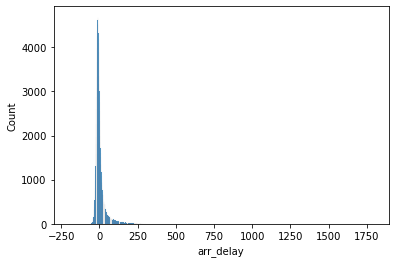

In [760]:
hist = sns.histplot(data = df['arr_delay'])

In [761]:
# Remove outlier values

In [762]:
df = df[(df['arr_delay'] > -100) & (df['arr_delay'] < 300)]

In [763]:
df.describe()['arr_delay']

count    156099.000000
mean          3.676436
std          36.817889
min         -73.000000
25%         -15.000000
50%          -6.000000
75%           7.000000
max         299.000000
Name: arr_delay, dtype: float64

In [764]:
df['arr_delay'].median()

-6.0

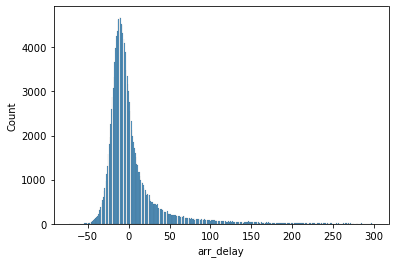

In [765]:
hist = sns.histplot(data = df['arr_delay'])

The delay looks to be normally distributed from the histogram. The mean of the delay is 2.

#### Task 2: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [766]:
#convert 
df['fl_date'] = pd.to_datetime(df['fl_date'], format='%Y-%m-%d')

In [767]:
# create a month column for flight
df['fd_month'] = df['fl_date'].dt.month

In [768]:
delay_month = df.groupby(by='fd_month').mean()['arr_delay']

In [769]:
delay_month_df = delay_month.to_frame()

In [770]:
delay_month_df.columns

Index(['arr_delay'], dtype='object')

In [771]:
delay_month_df['month'] = delay_month_df.index

In [772]:
delay_month['month'] = delay_month.index

<AxesSubplot:xlabel='month', ylabel='arr_delay'>

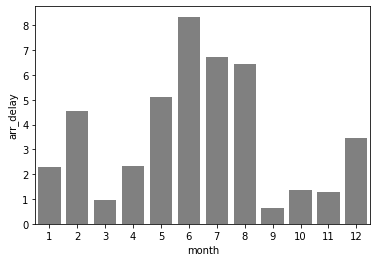

In [773]:
sns.barplot(data = delay_month_df, x = 'month', y = 'arr_delay', color='grey')

#### Task 4: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [775]:
# taxiout_depart_df = df.loc[(df['taxi_out'].notna()) & (df['dep_time'].notna())]
# taxiin_arrival_df = df.loc[(df['taxi_in'].notna()) & (df['arr_time'].notna())]

In [776]:
# def convert_time_to_string(x):
#     if np.isnan(x):
#         return '00:00'
    
#     if x == 2400:
#         return '23:59'
    
#     string = str(int(x))
    
#     if len(string) < 4:
#         for _ in range(4-len(string)):
#             string = '0' + string
    
#     return string[:2] + ':' + string[2:]

In [778]:
# taxiout_depart_df['dep_time'] = taxiout_depart_df['dep_time'].apply(lambda x: convert_time_to_string(x))
# taxiout_depart_df['dep_time'] = pd.to_datetime(taxiout_depart_df['dep_time'], format ='%H:%M')
# taxiout_depart_df['dep_hour'] = taxiout_depart_df['dep_time'].dt.hour



# taxiin_arrival_df['arr_time'] = taxiin_arrival_df['arr_time'].apply(lambda x: convert_time_to_string(x))
# taxiin_arrival_df['arr_time'] = pd.to_datetime(taxiin_arrival_df['arr_time'], format ='%H:%M')
# taxiin_arrival_df['arr_hour'] = taxiin_arrival_df['arr_time'].dt.hour


# dep_hour_taxi_out = taxiout_depart_df.groupby('dep_hour')['taxi_out'].mean()
# arr_hour_taxi_in = taxiin_arrival_df.groupby('arr_hour')['taxi_in'].mean()

In [781]:
# # Plot to show the Taxi In and Taxi Out Time
# axis = plt.subplots(figsize=(8,8))
# sns.set_color_codes("pastel")
# sns.set_context("notebook", font_scale=1.5)
# axis = sns.barplot(x=dep_hour_taxi_out.index, y=dep_hour_taxi_out.values,  color="g")
# axis = sns.barplot(x=arr_hour_taxi_in.index, y=arr_hour_taxi_in.values, color="b")
# axis1 = sns.lineplot(x=flights_per_hour.index, y=flights_per_hour.values/(50000),  color="violet", ls='-.', label='Flight')

# plt.legend(loc='top left')

In [782]:
# df.head(5)

In [783]:
# #df['Marks'] = df['Marks'].astype(str)
# df['dep_time'] = df['dep_time'].astype(str)
# df[['dep_time','dep_time_drop']] = df.dep_time.str.split(".",expand=True)
# df.drop(['dep_time_drop'], axis=1, inplace = True)
# #df[df['dep_time'].str.len()== 4]

In [739]:
# def led_zero(x):
#     if np.isnan(x):
#         return '00:00'
#     if x == 2400:
#         return '23:59'
#     string = str(int(x))
#     if len(string) < 4:
#         for _ in range(4-len(string)):
#             string = '0' + string
#     return string[:2] + ':' + string[2:]

#### Task 5: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [785]:
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier,op_unique_carrier,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,fd_month
0,2018-06-10,AA,AA,OH,14685,SAV,"Savannah, GA",11057,CLT,"Charlotte, NC",1249,1245.0,-4.0,11.0,1256.0,1343.0,17.0,1403,1400.0,-3.0,N,74.0,75.0,47.0,213.0,NaN,NaN,NaN,NaN,NaN,6
1,2019-05-08,WN,WN,WN,13232,MDW,"Chicago, IL",11066,CMH,"Columbus, OH",2255,2337.0,42.0,10.0,2347.0,129.0,3.0,105,132.0,27.0,N,70.0,55.0,42.0,283.0,27.0,0.0,0.0,0.0,0.0,5
2,2018-11-09,UA,UA,UA,13204,MCO,"Orlando, FL",11292,DEN,"Denver, CO",807,759.0,-8.0,13.0,812.0,1000.0,7.0,1005,1007.0,2.0,N,238.0,248.0,228.0,1546.0,NaN,NaN,NaN,NaN,NaN,11
3,2018-01-27,AA,AA,AA,15624,VPS,"Valparaiso, FL",11298,DFW,"Dallas/Fort Worth, TX",1326,1317.0,-9.0,9.0,1326.0,1508.0,3.0,1543,1511.0,-32.0,N,137.0,114.0,102.0,641.0,NaN,NaN,NaN,NaN,NaN,1
4,2019-11-05,DL,DL,DL,12892,LAX,"Los Angeles, CA",11298,DFW,"Dallas/Fort Worth, TX",1755,1747.0,-8.0,13.0,1800.0,2229.0,10.0,2256,2239.0,-17.0,N,181.0,172.0,149.0,1235.0,NaN,NaN,NaN,NaN,NaN,11
